In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, signal

plt.rcParams['figure.figsize'] = (20, 10)

This notebook is meant to illustrate the working of a D-class amplifier. I find it hard to believe that a PWM signal can carry an analogue audio signal, so I made this to test this. The demo modulates a 200kHz triangle wave 

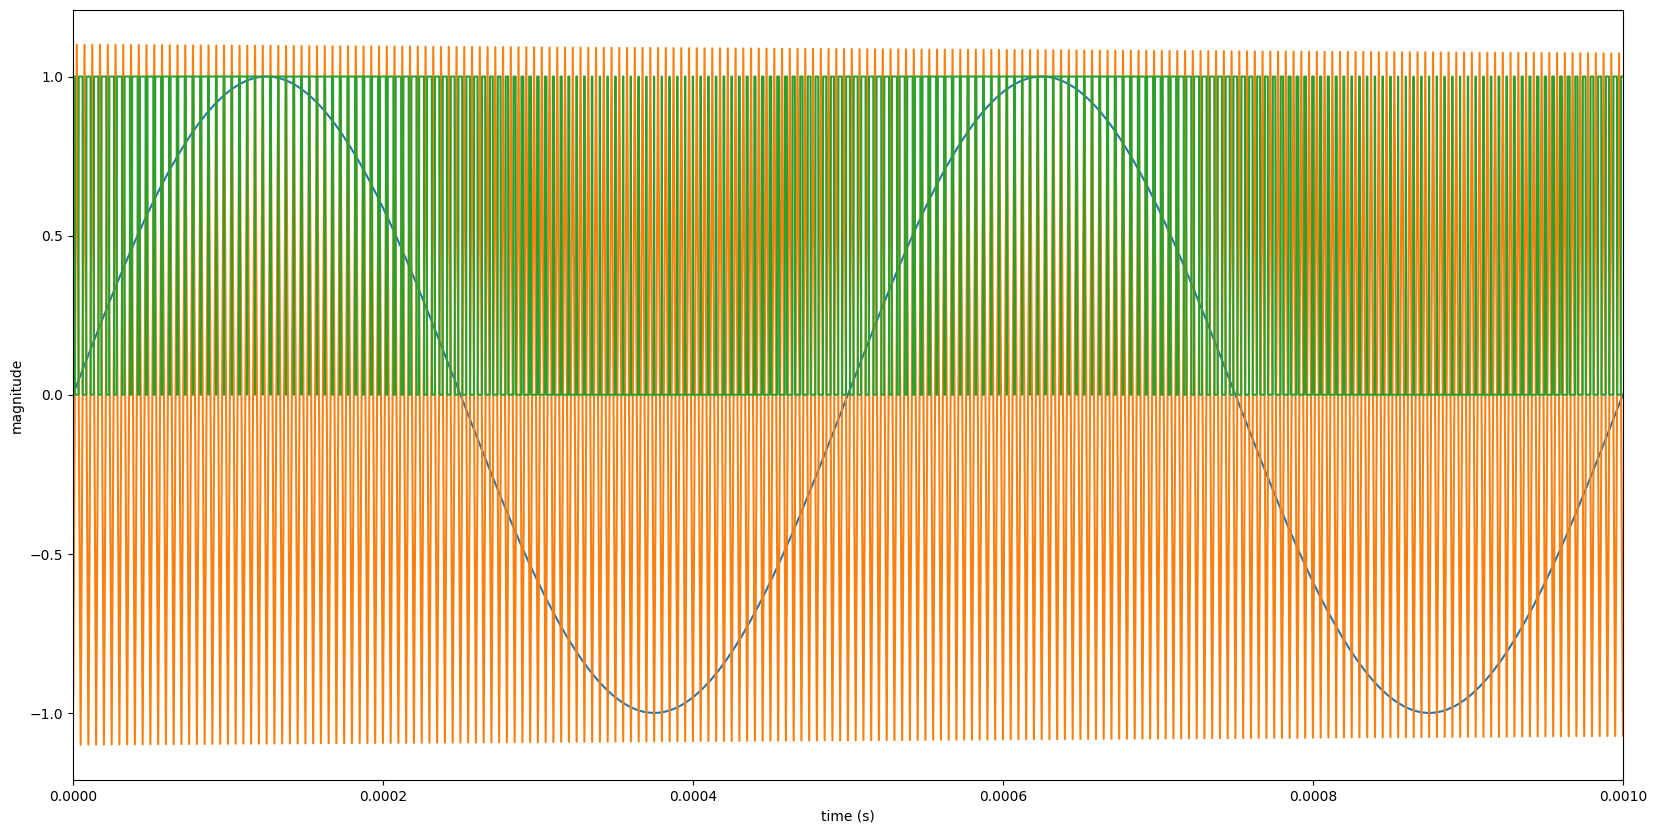

In [5]:
# Number of samplepoints
N = 32000
# sample spacing
T = 1.0 / 8000000.0

t = np.linspace(0.0, N * T, N)

# Audio wave
fa = np.sin(2.0 * np.pi * t * 2000.0)

# Triangle wave
# Wave is slighty larger amplitude then audio, since it prevents
# long on/off times due to the increasingly short on/off times.
# With this method, a minimal duty cycle frequency is ensured.
ftr = 1.1 * signal.sawtooth(200000.0 * 2.0 * np.pi * t, 0.5)

# Modulated PWM
fp = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr) ]

plt.plot(t, fa, t, ftr, t, fp)
plt.xscale('linear')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.xlim(0, 0.001)
plt.show()

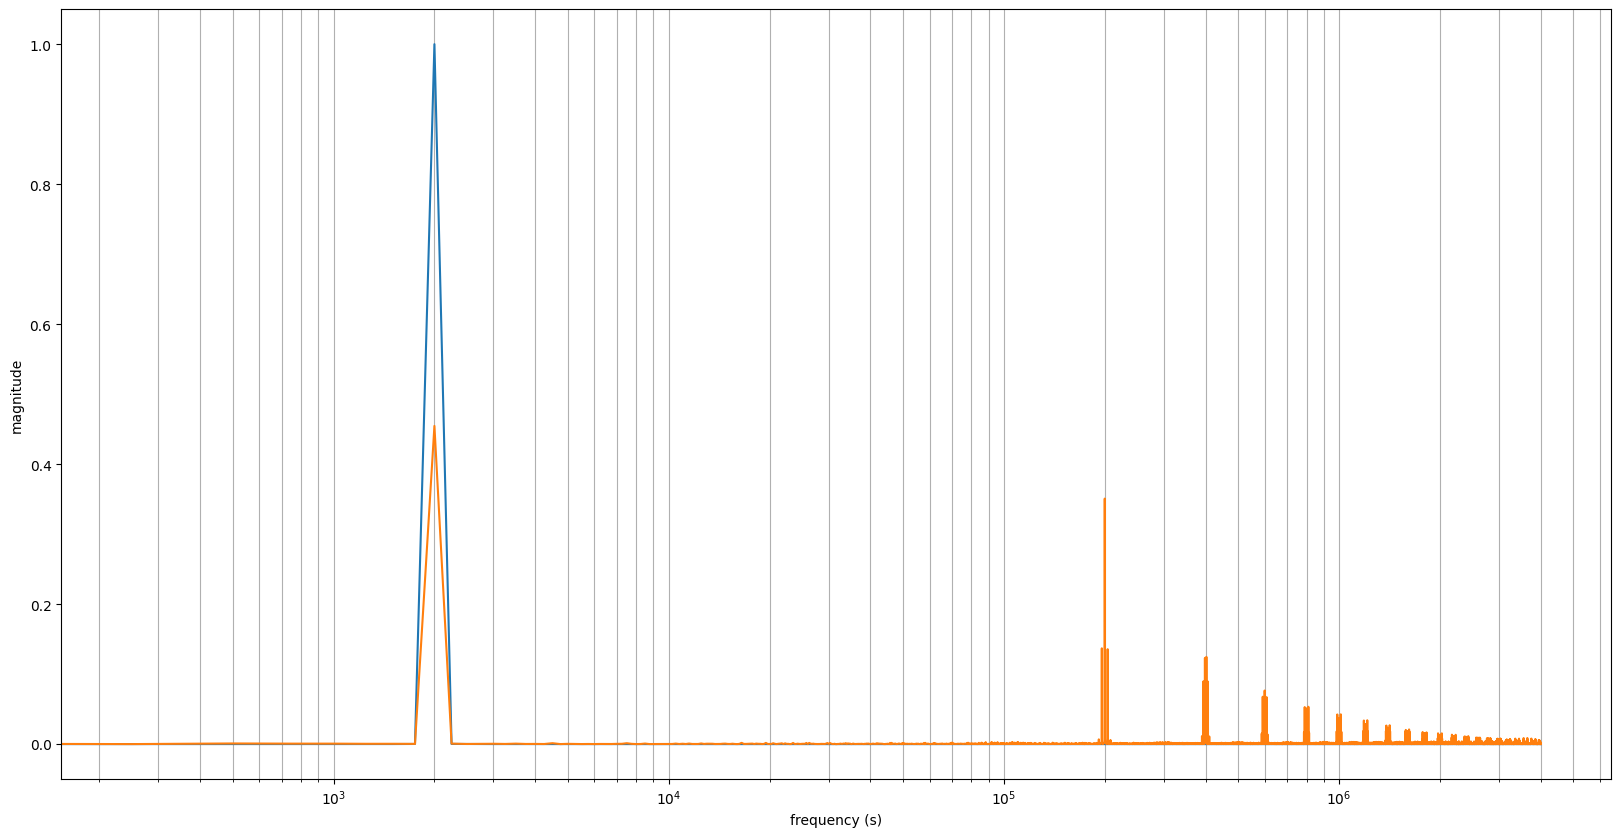

In [6]:
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

faf = fft.fft(fa)
fpf = fft.fft(fp)

plt.plot(xf, 2.0 / N * np.abs(faf[:N // 2]), xf, 2.0 / N * np.abs(fpf[:N // 2]))
plt.xscale('log', base=10)
plt.xlabel('frequency (s)')
plt.ylabel('magnitude')
plt.grid(True, which='both', axis='x')
plt.show()